In [16]:
#Here is chatbot link for pre-lec HW: https://chatgpt.com/share/66f4de29-de80-800b-af83-b3fa447779d9

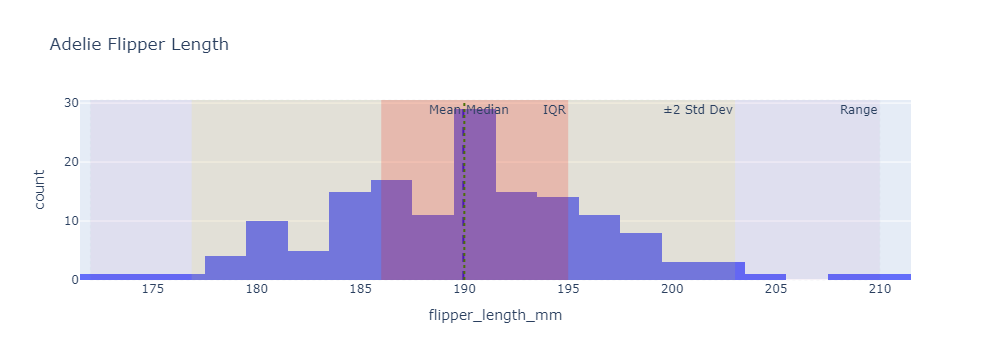

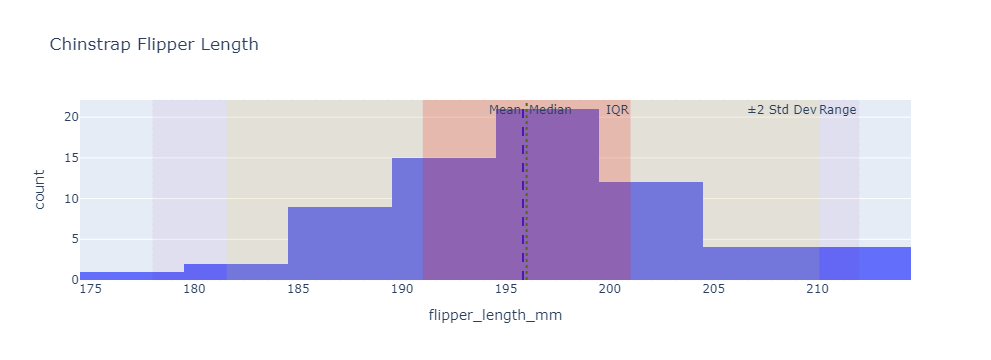

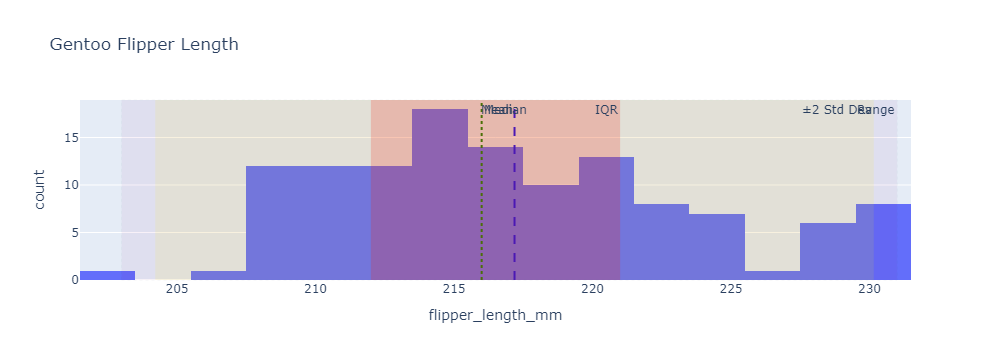

In [5]:
1.# plotly histograms with penguins dataset
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns

# Load dataset
penguins = sns.load_dataset('penguins')

# Define a function to create a histogram with annotations
def create_histogram_with_annotations(species):
    # Filter dataset by species
    df = penguins[penguins['species'] == species]
    
    # Calculate necessary statistics
    mean = df['flipper_length_mm'].mean()
    median = df['flipper_length_mm'].median()
    std = df['flipper_length_mm'].std()
    q1 = df['flipper_length_mm'].quantile(0.25)
    q3 = df['flipper_length_mm'].quantile(0.75)
    flipper_min = df['flipper_length_mm'].min()
    flipper_max = df['flipper_length_mm'].max()
    
    # Create histogram
    fig = px.histogram(df, x='flipper_length_mm', title=f'{species} Flipper Length')
    
    # Add vertical lines for mean and median
    fig.add_vline(x=mean, line=dict(color='blue', dash='dash'), annotation_text='Mean', annotation_position='top left')
    fig.add_vline(x=median, line=dict(color='green', dash='dot'), annotation_text='Median', annotation_position='top right')
    
    # Add shaded rectangles for IQR and 2 standard deviations from the mean
    fig.add_vrect(x0=q1, x1=q3, line_width=0, fillcolor='red', opacity=0.2, annotation_text='IQR')
    fig.add_vrect(x0=mean - 2*std, x1=mean + 2*std, line_width=0, fillcolor='yellow', opacity=0.1, annotation_text='±2 Std Dev')
    
    # Add range lines
    fig.add_vrect(x0=flipper_min, x1=flipper_max, line_width=1, line_dash="dot", fillcolor='purple', opacity=0.05, annotation_text='Range')
    
    fig.update_layout(showlegend=False)
    return fig

# Create histograms for each species
species_list = penguins['species'].unique()
for species in species_list:
    fig = create_histogram_with_annotations(species)
    fig.show()


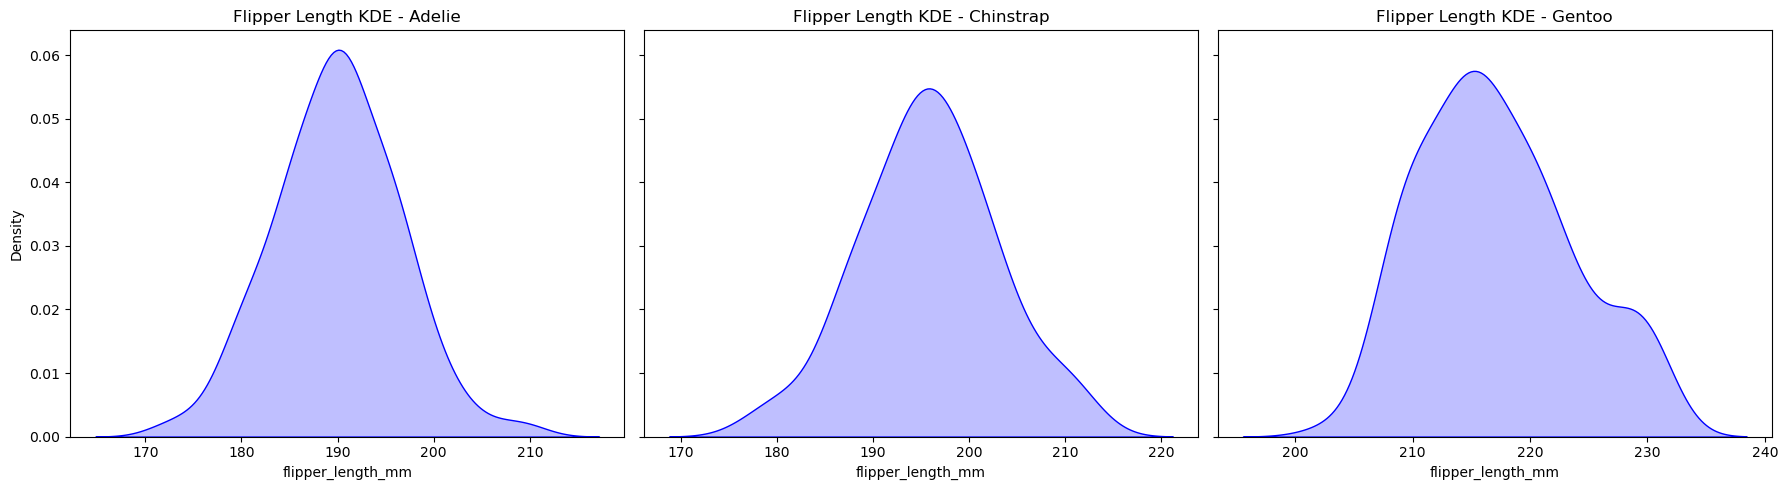

In [6]:
2.#seaborn kernel density estimation (KDE) plots 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the Penguins dataset
penguins = sns.load_dataset('penguins')

# Create a grid of KDE plots, one for each species
species_list = penguins['species'].unique()

# Set up the figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Loop through species and create a KDE plot for each
for i, species in enumerate(species_list):
    sns.kdeplot(data=penguins[penguins['species'] == species], 
                x='flipper_length_mm', 
                fill=True, 
                ax=axes[i], 
                color='blue')
    axes[i].set_title(f'Flipper Length KDE - {species}')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


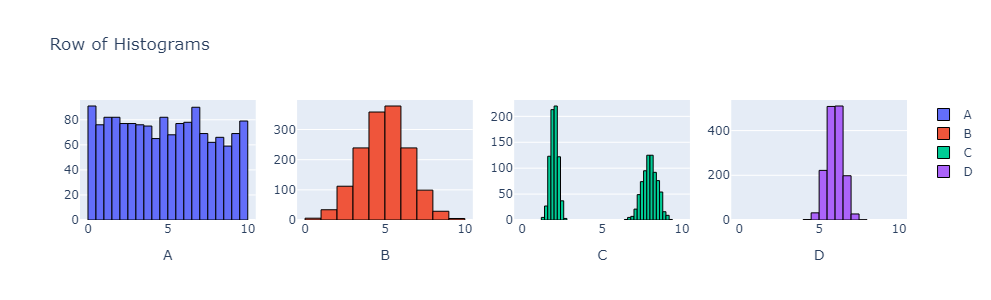

In [8]:
4.# rows of histograms
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [14]:
import numpy as np
import scipy.stats as stats

# Generate the data again
n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

# Calculate statistics for each dataset
datasets = [data1, data2, data3, data4]
dataset_names = ["Data 1 (A)", "Data 2 (B)", "Data 3 (C)", "Data 4 (D)"]

for i, data in enumerate(datasets):
    mean = np.mean(data)
    median = np.median(data)
    std_dev = np.std(data)
    
    print(f"Statistics for {dataset_names[i]}:")
    print(f"  Mean: {mean:.2f}")
    print(f"  Median: {median:.2f}")
    print(f"  Standard Deviation: {std_dev:.2f}")
    print()


Statistics for Data 1 (A):
  Mean: 5.00
  Median: 4.96
  Standard Deviation: 2.89

Statistics for Data 2 (B):
  Mean: 5.06
  Median: 5.09
  Standard Deviation: 1.49

Statistics for Data 3 (C):
  Mean: 4.98
  Median: 4.63
  Standard Deviation: 3.01

Statistics for Data 4 (D):
  Mean: 6.03
  Median: 6.03
  Standard Deviation: 0.50



In [15]:
#1.Which datasets have similar means and similar variances?
# D and C. 
#2.Which datasets have similar means but quite different variances?
# Both B and D have a similar means and D has a much more larger variances.
#3.Which datasets have similar variances but quite different means?
# B and C. 
#4.Which datasets have quite different means and quite different variances?
# A and B.

In [28]:
#Here is the chatbot record for post-lec HW: https://chatgpt.com/share/66f4ec4d-6650-800b-ac7e-2809cea59989

In [21]:
5.# general relationship bewteen mean and median and "right" and "left" skewness
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

In [22]:
#Mean and Median:
#For right-skewed distributions (like the gamma distribution when 𝑎<1), the mean is typically greater than the median. 
#This is because the long tail on the right pulls the mean upwards.
#In left-skewed distributions (e.g., a negatively skewed gamma when a>1), the mean is generally less than the median
#due to the long tail on the left.

#Skewness:
#Right Skewness: The distribution has a longer right tail. The mean is higher than the median. The code snippet
#involving stats.gamma(a=2, scale=2) generates a right-skewed distribution since 𝑎=2 is greater than 1, 
#indicating some right tail characteristics.
#Left Skewness: The distribution has a longer left tail. The mean is lower than the median. The sample2 generated
#with -stats.gamma(a=2, scale=2).rvs(size=1000) represents a left-skewed distribution, 
#shifting the right-skewed gamma distribution left.

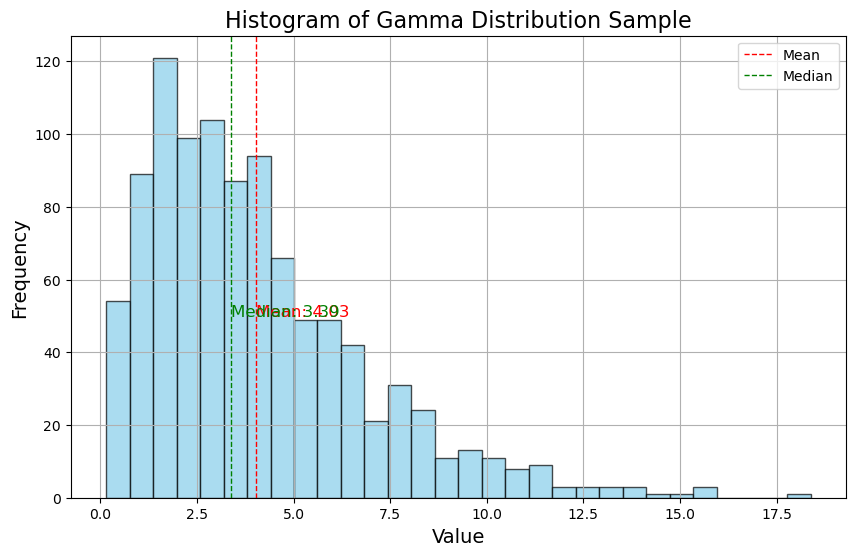

In [24]:
6.# an interesting dataset and its visualizations 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate a sample from a gamma distribution
a = 2  # shape parameter
scale = 2  # scale parameter
sample = stats.gamma(a=a, scale=scale).rvs(size=1000)

# Calculate mean and median
mean_value = np.mean(sample)
median_value = np.median(sample)

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(sample, bins=30, color='skyblue', alpha=0.7, edgecolor='black')

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label='Median')

# Add annotations
plt.text(mean_value, 50, f'Mean: {mean_value:.2f}', color='red', fontsize=12)
plt.text(median_value, 50, f'Median: {median_value:.2f}', color='green', fontsize=12)

# Labels and title
plt.title('Histogram of Gamma Distribution Sample', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.grid()

# Show the plot
plt.show()


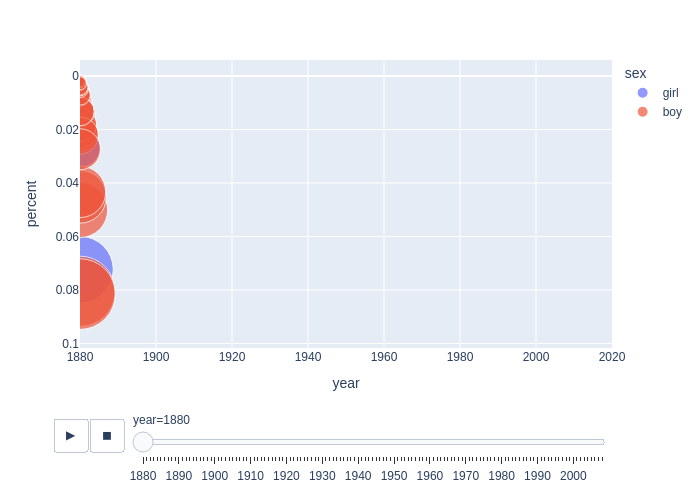

In [27]:
import pandas as pd
import plotly.express as px

# Load the dataset
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

# Make identical boy and girl names distinct
bn['name'] = bn['name'] + " " + bn['sex']

# Rank names based on their percentage
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)

# Sort values
bn = bn.sort_values(['name', 'year'])

# Create increase or decrease in name prevalence from the last year
bn['percent change'] = bn['percent'].diff()
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent']

# Sort by year
bn = bn.sort_values('year')

# Restrict to common names
bn = bn[bn.percent > 0.001]

# Create a scatter plot
fig = px.scatter(bn,
                 x='year',              # X-axis: Year
                 y='percent',           # Y-axis: Percentage of births
                 animation_frame='year', # Animate by year
                 animation_group='name', # Group by name for animation
                 size='percent',        # Size of points based on percentage
                 color='sex',           # Color points by sex
                 hover_name='name',     # Hover information shows name
                 size_max=50, 
                 range_x=[1880, 2020])  # Adjust the range for the x-axis

# Reverse the y-axis to put rank 1 on top
fig.update_yaxes(autorange='reversed')

# Display the plot
fig.show(renderer="png")  # Use for GitHub and MarkUs submissions
